# Advanced API Usage

DrugEx uses concepts of object-oriented programming and inheritance to allow for easy customization of the behaviour of the different components. The user can either implement their own versions of the classes or use the provided ones and override the methods that need to be changed. In this tutorial, we will show how to do this on a few examples that we think might be of interest to users.

## Creating the Data Set

The main task of this tutorial will be to create a pretrained RNN model that can take stereochemistry into account. This might for example be of interest when a docking approach is to be used to score molecules under the reinforcement learning framework later. Thus, having a model that can learn to incorporate relevant stereocenters into the generated structures would be of interest. We will reuse our A2AR data set from the basic tutorials:

In [31]:
import os
import pandas as pd

DATASETS_PATH = '../data/data'

df = pd.read_table(os.path.join(DATASETS_PATH, 'A2AR_LIGANDS.tsv'))
df

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AACWUFIIMOHGSO_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.91968,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P29274_WT,...,NaN,NaN,=,8.68,8.68,0.0,0.0,1.0,8.68,0.0
1,AAEYTMMNWWKSKZ_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131451,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,AAEYTMMNWWKSKZ,AAEYTMMNWWKSKZ-UHFFFAOYSA-N,InChI=1S/C18H16N4O3S/c19-15-13-9-10-3-1-2-4-14...,"""AuxInfo=1/1/N:22,23,21,24,8,15,9,14,19,20,7,1...",P29274_WT,...,NaN,NaN,=,4.82,4.82,0.0,0.0,1.0,4.82,0.0
2,AAGFKZWKWAMJNP_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.100375,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P29274_WT,...,NaN,NaN,=,5.65,5.65,0.0,0.0,1.0,5.65,0.0
3,AANUKDYJZPKTKN_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.123484,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,AANUKDYJZPKTKN,AANUKDYJZPKTKN-UHFFFAOYSA-N,InChI=1S/C28H31ClN6O5/c1-30-27(39)28-13-18(28)...,"""AuxInfo=1/1/N:1,25,18,19,17,20,35,36,34,16,21...",P29274_WT,...,NaN,NaN,=,5.45,5.45,0.0,0.0,1.0,5.45,0.0
4,AASXHCGIIQCKEE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.419145,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,AASXHCGIIQCKEE,AASXHCGIIQCKEE-UHFFFAOYSA-N,InChI=1S/C24H27N5O6S/c1-4-12-29-23(31)20-21(26...,"""AuxInfo=1/1/N:1,14,30,2,20,26,34,27,33,15,21,...",P29274_WT,...,NaN,NaN,=,5.2,5.20,0.0,0.0,1.0,5.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,ZYXGKENMDDPQIE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.399078,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,ZYXGKENMDDPQIE,ZYXGKENMDDPQIE-UHFFFAOYSA-N,InChI=1S/C19H18N6O3/c1-20-19-22-11-14(17-23-16...,"""AuxInfo=1/1/N:1,16,24,23,12,18,13,17,25,10,5,...",P29274_WT,...,NaN,NaN,=,7.09,7.09,0.0,0.0,1.0,7.09,0.0
4078,ZYZWFDVXMLCIOU_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.94689,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,ZYZWFDVXMLCIOU,ZYZWFDVXMLCIOU-UHFFFAOYSA-N,InChI=1S/C18H16N6O2/c19-17-22-14(13-7-4-10-26-...,"""AuxInfo=1/1/N:22,21,23,7,20,24,6,18,17,8,12,1...",P29274_WT,...,NaN,NaN,=,8.22,8.22,0.0,0.0,1.0,8.22,0.0
4079,ZZBZWSYDXUPJCT_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131461,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,ZZBZWSYDXUPJCT,ZZBZWSYDXUPJCT-UHFFFAOYSA-N,InChI=1S/C12H11FN8S2/c13-6-1-3-7(4-2-6)16-11-1...,"""AuxInfo=1/1/N:8,11,7,12,15,9,6,14,2,20,4,17,1...",P29274_WT,...,NaN,NaN,=,4.89,4.89,0.0,0.0,1.0,4.89,0.0
4080,ZZMIPZLRKFEGIA_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.202018,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,ZZMIPZLRKFEGIA,ZZMIPZLRKFEGIA-UHFFFAOYSA-N,InChI=1S/C20H23N3O3/c1-5-12-26-16-10-7-14(8-11...,"""AuxInfo=1/0/N:1,24,22,18,2,9,7,25,10,6,26,3,1...",P29274_WT,...,NaN,NaN,=,6.51,6.51,0.0,0.0,1.0,6.51,0.0


The original data does not have stereochemistry information, so we will use RDKit to enumerate all possible stereoisomers for each molecule. It will also augment our data set with new data points as well, so we should be able to see some effect during pretraining. We will use the `EnumerateStereoisomers` function from RDKit to do this:

In [32]:
from rdkit import Chem
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions

def enumerate_stereo(smiles):
    mol = Chem.MolFromSmiles(smiles)
    options = StereoEnumerationOptions(onlyUnassigned=False, unique=True)
    isomers = list(EnumerateStereoisomers(mol, options))
    return [Chem.MolToSmiles(mol, isomericSmiles=True) for mol in isomers]

# apply function to the SMILES column and return the extended list
smiles_train = df['SMILES'].apply(enumerate_stereo)
# unnest the list
smiles_train = smiles_train.explode()
len(smiles_train)

19810

## Custom Standardization

Different data sets might sometimes need different standardization or filtering steps. We can do this by implementing a custom standardization function and passing it to the `Standardization` class. The function should take a SMILES string as input and return a standardized SMILES string as output. If the standardization fails, the function should raise a `StandardizationException` with a message describing the error. You can also throw this exception for molecules that you want to filter out. They will not be included in the final set. We will use the `Papyrus_standardizer` from the `papyrus_structure_pipeline` package as an example custom standardizer:

In [33]:
from drugex.molecules.converters.standardizers import StandardizationException
from papyrus_structure_pipeline import standardizer as Papyrus_standardizer

def custom_standardizer(smiles):
    """
    Standardize SMILES with the Papyrus standardizer.

    Args:
        smiles: input raw smiles

    Returns:
        standardized smiles

    Raises:
        StandardizationException: if standardization fails, the molecule will be skipped and not appear in the result set
    """

    try:
        mol = Chem.MolFromSmiles(smiles)
        out = Papyrus_standardizer.standardize(mol)
        if not out:
            raise Exception("Failed to standardize with Papyrus standardizer.")
    except Exception as exp:
        raise StandardizationException(f"Failed to standardize with error: {exp}")
    return Chem.MolToSmiles(out, isomericSmiles=True, canonical=True) if out else None

Pass the new standardizer to the `Standardization` class and apply it to the data set. The `Standardization` class automatically parallelizes the standardization process:

In [34]:
from drugex.data.processing import Standardization
from drugex.logs import logger
logger.setLevel('ERROR') # uncomment this line to see warnings resulting from catching exceptions above

N_PROCESSES = 12
CHUNK_SIZE = 1000

standardizer = Standardization(n_proc=N_PROCESSES, chunk_size=CHUNK_SIZE, standardizer=custom_standardizer)
smiles_train = standardizer.apply(smiles_train)
len(smiles_train)

Standardizing molecules (batch processing):   0%|          | 0/2 [00:00<?, ?it/s]

19472

We also canonize the SMILES strings in the standardizer so that we can now drop duplicates:

In [35]:
# remove duplicates
smiles_train = pd.Series(smiles_train).drop_duplicates()
len(smiles_train)

17144

If we wanted to augment the set further, we could also generate random SMILES strings from the canonical ones at this point. We will skip this step for now.

## Custom Vocabulary with Stereochemistry

Including stereochemistry for the DrugEx model is easy. We just need to add new tokens to the SMILES vocabulary (`VocSmiles`). By default, it does not include any stereochemistry tokens. You can see the default words after instantiating the class:

In [36]:
from drugex.data.corpus.vocabulary import VocSmiles

voc = VocSmiles(encode_frags=False)
voc.words

['GO',
 'EOS',
 '#',
 '%',
 '(',
 ')',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 'B',
 'C',
 'F',
 'I',
 'L',
 'N',
 'O',
 'P',
 'R',
 'S',
 '[Ag-3]',
 '[As+]',
 '[As]',
 '[B-]',
 '[BH-]',
 '[BH2-]',
 '[BH3-]',
 '[B]',
 '[C+]',
 '[C-]',
 '[CH-]',
 '[CH2]',
 '[CH]',
 '[I+]',
 '[IH2]',
 '[N+]',
 '[N-]',
 '[NH+]',
 '[NH-]',
 '[NH2+]',
 '[N]',
 '[O+]',
 '[O-]',
 '[OH+]',
 '[O]',
 '[P+]',
 '[PH]',
 '[S+]',
 '[S-]',
 '[SH+]',
 '[SH2]',
 '[SH]',
 '[Se+]',
 '[SeH]',
 '[Se]',
 '[SiH2]',
 '[SiH]',
 '[Si]',
 '[Te]',
 '[b-]',
 '[c+]',
 '[c-]',
 '[cH-]',
 '[n+]',
 '[n-]',
 '[nH+]',
 '[nH]',
 '[o+]',
 '[s+]',
 '[se+]',
 '[se]',
 '[te+]',
 '[te]',
 'b',
 'c',
 'n',
 'o',
 'p',
 's']

Default words are also accessible for all vocabularies in DrugEx with the `defaultWords` class attribute:

In [37]:
VocSmiles.defaultWords

('#',
 '%',
 '(',
 ')',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 'B',
 'C',
 'F',
 'I',
 'L',
 'N',
 'O',
 'P',
 'R',
 'S',
 '[Ag-3]',
 '[As+]',
 '[As]',
 '[B-]',
 '[BH-]',
 '[BH2-]',
 '[BH3-]',
 '[B]',
 '[C+]',
 '[C-]',
 '[CH-]',
 '[CH2]',
 '[CH]',
 '[I+]',
 '[IH2]',
 '[N+]',
 '[N-]',
 '[NH+]',
 '[NH-]',
 '[NH2+]',
 '[N]',
 '[O+]',
 '[O-]',
 '[OH+]',
 '[O]',
 '[P+]',
 '[PH]',
 '[S+]',
 '[S-]',
 '[SH+]',
 '[SH2]',
 '[SH]',
 '[Se+]',
 '[SeH]',
 '[Se]',
 '[SiH2]',
 '[SiH]',
 '[Si]',
 '[Te]',
 '[b-]',
 '[c+]',
 '[c-]',
 '[cH-]',
 '[n+]',
 '[n-]',
 '[nH+]',
 '[nH]',
 '[o+]',
 '[s+]',
 '[se+]',
 '[se]',
 '[te+]',
 '[te]',
 'b',
 'c',
 'n',
 'o',
 'p',
 's')

If we already know which tokens we want to add specifically, we can add them directly to a custom implementation:

In [38]:
class CustomVocabulary(VocSmiles):

    defaultWords = VocSmiles.defaultWords + ('[C@@H]', '[C@@]', '[C@H]', '[C@]')

    def __init__(self):
        super().__init__(encode_frags=False, words=self.defaultWords)

CustomVocabulary().words

['GO',
 'EOS',
 '#',
 '%',
 '(',
 ')',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 'B',
 'C',
 'F',
 'I',
 'L',
 'N',
 'O',
 'P',
 'R',
 'S',
 '[Ag-3]',
 '[As+]',
 '[As]',
 '[B-]',
 '[BH-]',
 '[BH2-]',
 '[BH3-]',
 '[B]',
 '[C+]',
 '[C-]',
 '[C@@H]',
 '[C@@]',
 '[C@H]',
 '[C@]',
 '[CH-]',
 '[CH2]',
 '[CH]',
 '[I+]',
 '[IH2]',
 '[N+]',
 '[N-]',
 '[NH+]',
 '[NH-]',
 '[NH2+]',
 '[N]',
 '[O+]',
 '[O-]',
 '[OH+]',
 '[O]',
 '[P+]',
 '[PH]',
 '[S+]',
 '[S-]',
 '[SH+]',
 '[SH2]',
 '[SH]',
 '[Se+]',
 '[SeH]',
 '[Se]',
 '[SiH2]',
 '[SiH]',
 '[Si]',
 '[Te]',
 '[b-]',
 '[c+]',
 '[c-]',
 '[cH-]',
 '[n+]',
 '[n-]',
 '[nH+]',
 '[nH]',
 '[o+]',
 '[s+]',
 '[se+]',
 '[se]',
 '[te+]',
 '[te]',
 'b',
 'c',
 'n',
 'o',
 'p',
 's']

However, we can also infer tokens from the data set, which is what we will do now. We will use the `addWordsFromSeq` method of the `VocSmiles` class to add all tokens from the data set. This method takes a SMILES string as input and returns the appropriate list of tokens, but it also adds new tokens to the vocabulary:

In [39]:
tokens = []
for smile in smiles_train:
    tokenized = voc.addWordsFromSeq(smile, ignoreConstraints=True)
    tokens.append(tokenized)

We can now easily check which tokens were added to the vocabulary:

In [40]:
set(voc.words) - set(VocSmiles(encode_frags=False).words)

{'/', '[C@@H]', '[C@@]', '[C@H]', '[C@]', '[S@+]', '[S@@+]', '\\'}

In `tokens`, we have each of the SMILES tokenized to words:

In [41]:
print(len(tokens))
tokens[0]

17144


['C',
 'c',
 '1',
 'c',
 'c',
 '(',
 'C',
 ')',
 'n',
 '(',
 '-',
 'c',
 '2',
 'c',
 'c',
 '(',
 'N',
 'C',
 '(',
 '=',
 'O',
 ')',
 'C',
 'C',
 'N',
 '(',
 'C',
 ')',
 'C',
 ')',
 'n',
 'c',
 '(',
 '-',
 'c',
 '3',
 'c',
 'c',
 'c',
 '(',
 'C',
 ')',
 'o',
 '3',
 ')',
 'n',
 '2',
 ')',
 'n',
 '1',
 'EOS']

If we just want to split a SMILES string into tokens, we can use the `splitSequence` method of the `VocSmiles` class:

In [42]:
tokens = []
for smile in smiles_train:
    tokenized = voc.splitSequence(smile)
    tokens.append(tokenized)

tokens[0]

['C',
 'c',
 '1',
 'c',
 'c',
 '(',
 'C',
 ')',
 'n',
 '(',
 '-',
 'c',
 '2',
 'c',
 'c',
 '(',
 'N',
 'C',
 '(',
 '=',
 'O',
 ')',
 'C',
 'C',
 'N',
 '(',
 'C',
 ')',
 'C',
 ')',
 'n',
 'c',
 '(',
 '-',
 'c',
 '3',
 'c',
 'c',
 'c',
 '(',
 'C',
 ')',
 'o',
 '3',
 ')',
 'n',
 '2',
 ')',
 'n',
 '1',
 'EOS']

### Encoding and Decoding Tokenized Sequences

Tokenized sequences are encoded to a numerical representation with the `encode` method:

In [43]:
encoded = voc.encode(tokens[0:3])
encoded

tensor([[20, 90,  9, 90, 90,  4, 20,  5, 91,  4,  6, 90, 10, 90, 90,  4, 24, 20,
          4, 18, 25,  5, 20, 20, 24,  4, 20,  5, 20,  5, 91, 90,  4,  6, 90, 11,
         90, 90, 90,  4, 20,  5, 92, 11,  5, 91, 10,  5, 91,  9,  1,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [24, 90,  9, 90,  4, 20,  4, 18, 25,  5, 24, 90, 10, 90, 90, 90,  4, 48,
          4, 18, 25,  5, 55,  5, 90, 90, 10,  5, 94, 90, 10, 91, 90, 11, 90,  4,
         90, 90,  9, 10,  5, 20, 20, 20, 20, 11,  1,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [25, 18, 20,  4, 24, 90,  9, 91, 90, 10, 91, 90, 90, 90, 90, 10, 91, 10,
         

And can be decoded back to the original tokenized sequence with the `decode` method:

In [44]:
voc.decode(encoded[0], is_tk=False)

'Cc1cc(C)n(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)n1'

We can do so also for the tokens directly:

In [45]:
voc.decode(tokens[0], is_tk=True)

'Cc1cc(C)n(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)n1'

#### Note About Transformers

The DrugEx transformers accept a fragment-molecule pair as input so the encoding/decoding is slightly different. For `VocSmiles`, we need to specify the `encode_frags` parameter as `True` and for `VocGraph` there are just the `encode` and `decode` methods that directly produce either fragment-molecule pairs or the encoded matrix. Therefore, the overall philosophy of overriding these methods for custom behaviour is the same and users are invited to check out [the documentation and source code](https://cddleiden.github.io/DrugEx/docs/api/drugex.data.corpus.html?highlight=vocabulary#module-drugex.data.corpus.vocabulary) of these classes if they need to be changed.

## Encoding the Data Set

Now we can use the new vocabulary to encode the data set:

In [46]:
from drugex.data.corpus.corpus import SequenceCorpus
from drugex.data.processing import CorpusEncoder

DATA_DIR = "data/datasets/encoded/rnn/"
os.makedirs(DATA_DIR, exist_ok=True)

encoder = CorpusEncoder(
    SequenceCorpus, # corpus is just a placeholder for the code we already showed above that can do this in parallel, see processMolecule implementation for details
    {
        'vocabulary': voc,
        'update_voc': False,
        'throw': True

    },
    n_proc=N_PROCESSES,
    chunk_size=CHUNK_SIZE
)

Note that in this case we could also just specify `update_voc` as `True` and the new tokens would be added to the vocabulary just as well and saved alongside the data set. So the steps above would not be necessary. In fact, the `SequenceCorpus` class is just a placeholder for the code we already showed above so that we can use the `CorpusEncoder` to run the tokenization and encoding operations in parallel for large data sets. The `SmilesDataSet` just collects this data in a nice way for us from the worker processes:

In [47]:
from drugex.data.datasets import SmilesDataSet
data_collector = SmilesDataSet(os.path.join(DATA_DIR, 'ligand_corpus.tsv'), rewrite=True)
encoder.apply(smiles_train, collector=data_collector)

SequenceCorpus (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

The complete data matrix for all our molecules can be accessed with the `getData` method:

In [48]:
data_collector.getData()

array([[20, 90,  9, ...,  0,  0,  0],
       [24, 90,  9, ...,  0,  0,  0],
       [25, 18, 20, ...,  0,  0,  0],
       ...,
       [20, 20, 20, ...,  0,  0,  0],
       [20, 20, 20, ...,  0,  0,  0],
       [20, 20, 25, ...,  0,  0,  0]])

However, you can imagine that for very large data sets that we would normally use for pretraining, this would be a very large matrix and storing it in memory would not be ideal. We will not provide a complete solution here since it would be out of scope of this quick tutorial, but we could for example make use of a [method published by Biswajit Sahoo](https://biswajitsahoo1111.github.io/post/reading-multiple-csv-files-in-pytorch/) that uses multiple CSV files on disk to store the data in chunks and then load it into a PyTorch data set. We will just show the basic idea here:

In [49]:
from torch.utils.data import Dataset, DataLoader


class CustomTorchDataset(Dataset):
    """
    Implementation of a chunked data set from multiple files. We will just generate a simple template here, full reference implementation here: https://biswajitsahoo1111.github.io/post/reading-multiple-csv-files-in-pytorch/.
    """

    def __init__(self, paths, batch_size):
        """

        Args:
            paths: paths to the individual files that chunk the data set
            batch_size:  requested batch size
        """

        self.paths = paths
        self.batch_size = batch_size


class ChunkedDataSet(SmilesDataSet):
    """
    Custom implementation of the `SmilesDataSet` that saves the data in multiple files instead of one. The implementation is not complete and just serves as a template.

    """

    def __init__(self, chunk_size, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.chunkSize = chunk_size

    def sendDataToFile(self, data, columns=None):
        """
        Sends one chunk of encoded data to its own file. Should keep track of the generated files and their paths.

        Args:
            data: chunk of data to save (output of one encoding process)
            columns: column names to use for the encoded data
        """
        pass

    def getData(self, chunk_size=None):
        """
        Redefines the `getData` method to return a list of paths to the files that contain the encoded data instead of the data itself.

        Args:
            chunk_size: ignored in this case

        Returns:
            a list of paths to the files that contain the encoded data

        """
        pass

    @staticmethod
    def dataToLoader(data, batch_size, vocabulary):
        """
        Use the new data set implementation to provide a new data loader that loads data set from files in a chunked manner.

        Args:
            data: paths to the split files
            batch_size: batch size
            vocabulary: vocabulary used for encoding (not used in this case)

        Returns:
            the assembled data loader
        """
        dataset = CustomTorchDataset(data, batch_size)
        loader = DataLoader(dataset, batch_size = None, shuffle = True)
        return loader

We would then use the `ChunkedDataSet` in the same way as the `SmilesDataSet` before (commented out because the implementation is incomplete):

In [50]:
# data_collector = ChunkedDataSet(512, os.path.join(DATA_DIR, 'ligand_corpus.tsv'), rewrite=True)
# encoder.apply(smiles_train, collector=data_collector)

## Model Training and Custom Monitors

Once we have a way to generate a data loader for the encoded data, we can train the model. The model classes themselves also have overridable methods, which we will not detail here, but a common task is monitoring the progress of training. This is done by implementations of the `TrainingMonitor` interface. Here we showcase two examples, `ChainedMonitor` and `PrintMonitor`. The `ChainedMonitor` just chains together multiple monitoring classes and the `PrintMonitor` just prints some specific information to the standard output.

In [51]:
from drugex.training.interfaces import TrainingMonitor
from drugex.training.generators import SequenceRNN
from drugex.training.monitors import FileMonitor

class ChainedMonitor(TrainingMonitor):
    """
    Apply multiple monitors in a chain.
    """

    def __init__(self, monitors):
        self.monitors = monitors
        self.bestModelState = None
        self.saveModelOption = 'best'

    def saveModel(self, model, identifier=None):
        """
        Process the currently best model.

        Args:
            model: currently best model
            identifier: Suffix added to saved model.
        """
        self.bestModelState = model.getModel()
        for monitor in self.monitors:
            monitor.saveModel(model)

    def savePerformanceInfo(self, performance_dict, df_smiles=None):
        """
        Save the performance information to all monitors.

        Args:
            performance_dict: dictionary with performance information
            df_smiles: optional data frame with SMILES of molecules that were used to generate the performance data
        """

        for monitor in self.monitors:
            monitor.savePerformanceInfo(performance_dict, df_smiles)

    def saveProgress(self, model,  current_step=None, current_epoch=None, total_steps=None, total_epochs=None, *args, **kwargs):
        """
        Save the progress information to all monitors.
        Args:
            model: current model
            current_step: current step
            current_epoch:  current epoch
            total_steps: total number of steps
            total_epochs: total number of epochs
            *args: any additional arguments
            **kwargs: any additional keyword arguments
        """
        for monitor in self.monitors:
            monitor.saveProgress(model, current_step, current_epoch, total_steps, total_epochs, *args, **kwargs)

    def endStep(self, step, epoch):
        """
        End the current step.
        Args:
            step: current step
            epoch: current epoch
        """
        for monitor in self.monitors:
            monitor.endStep(step, epoch)

    def close(self):
        """
        Close all monitors at the end of training.
        """

        for monitor in self.monitors:
            monitor.close()

    def getModel(self):
        """
        Get the best model state.
        """
        return self.bestModelState

    def getSaveModelOption(self):
        """
        Set the best model state.
        """
        return self.saveModelOption


class PrintMonitor(TrainingMonitor):
    """Simply print current training loss at the current epoch."""

    def saveModel(self, model):
        pass

    def savePerformanceInfo(self, performance_dict, df_smiles=None):
        """Do the print."""
        print(f"Loss at epoch {performance_dict['Epoch']}:", performance_dict['loss_train'])

    def saveProgress(self, model, current_step=None, current_epoch=None, total_steps=None, total_epochs=None, *args, **kwargs):
        pass

    def endStep(self, step, epoch):
        pass

    def close(self):
        pass

    def getModel(self):
        pass

    def getSaveModelOption(self):
        pass


GPUS = [0]
MODEL_DIR = "data/models/pretrained/rnn/a2ar_stereo"
os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, 'a2ar_stereo')
model = SequenceRNN(voc, is_lstm=True, use_gpus=GPUS)
monitor_1 = FileMonitor(model_path, save_smiles=True, reset_directory=True)
monitor_2 = PrintMonitor()
monitor = ChainedMonitor([monitor_1, monitor_2])
model.fit(data_collector.asDataLoader(512), valid_loader=None, epochs=10, monitor=monitor)

voc.toFile(os.path.join(MODEL_DIR, 'a2ar_stereo.vocab'))

Fitting model:   0%|          | 0/10 [00:00<?, ?it/s]

Loss at epoch 1: 1.3449254035949707
Loss at epoch 2: 1.1456966400146484
Loss at epoch 3: 0.7521368265151978
Loss at epoch 4: 0.5169383883476257
Loss at epoch 5: 0.3893982470035553
Loss at epoch 6: 0.3045401871204376
Loss at epoch 7: 0.26557859778404236
Loss at epoch 8: 0.22327975928783417
Loss at epoch 9: 0.20189863443374634
Loss at epoch 10: 0.17792420089244843


After the training has finished, we still have all the regular `FileMonitor` files thanks to the `ChainedMonitor`:

In [52]:
df_info = pd.read_csv(f'{MODEL_DIR}/a2ar_stereo_fit.tsv', sep='\t')
df_info.tail()

,Epoch,loss_train,valid_ratio,best_epoch
5,6,0.305,0.028,6
6,7,0.266,0.068,7
7,8,0.223,0.134,8
8,9,0.202,0.188,9
9,10,0.178,0.272,10


<Axes: >

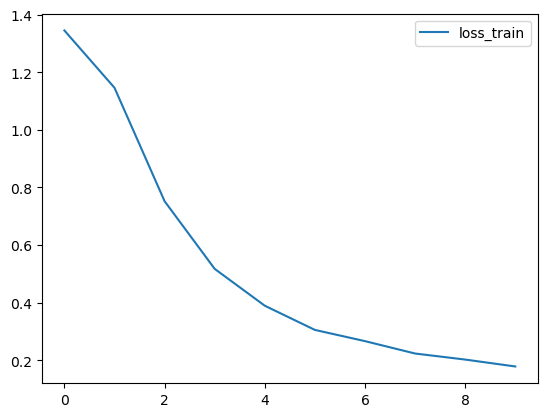

In [53]:
df_info[['loss_train']].plot.line()

We could also just simply override the `savePerformanceInfo` method of the `FileMonitor` to achieve the same effect, but in this case we wanted to showcase all the monitor methods and having the monitors seperated also makes it easier to reuse them across our codebase.

As you saw, even on this small data set the model is able to learn and the validity of the molecules improves over time. We can now check that the valid molecules the model produces make use of the new tokens and tha they include stereochemistry:

In [54]:
import sys
sys.path.append('../')
from utils import smilesToGrid

model.loadStatesFromFile(f'{MODEL_DIR}/a2ar_stereo.pkg')
generated = model.generate(num_samples=100, drop_invalid=True)
smilesToGrid(generated.SMILES)

Generating molecules:   0%|          | 0/100 [00:00<?, ?it/s]

MolGridWidget()